# Fix tonemapping from cameras 5-6-7

In [25]:
import cv2
import numpy as np
import sys
import os
import shutil
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

orig = "data/wildtrack/images"
dest = "data/wildtrack_tonemaped/images"

folders_to_copy = ["1", "2", "3", "4"]
folders_to_tonemap = ["5", "6", "7"]


for folder in folders_to_copy:
    orig_folder = os.path.join(orig, folder)
    dest_folder = os.path.join(dest, folder)
    
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    for file in os.listdir(orig_folder):
        shutil.copyfile(os.path.join(orig_folder, file), os.path.join(dest_folder, file))

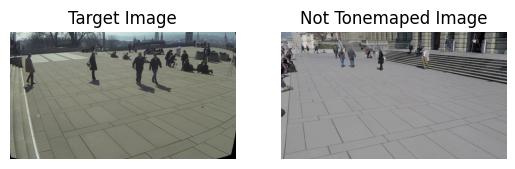

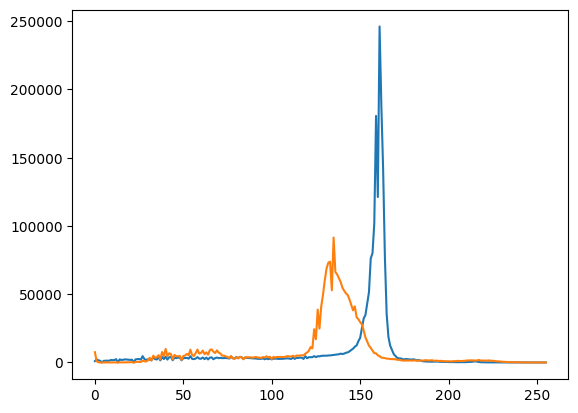

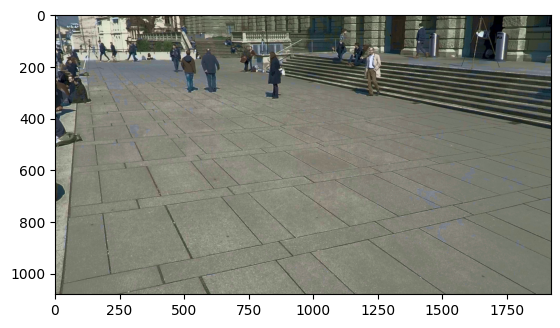

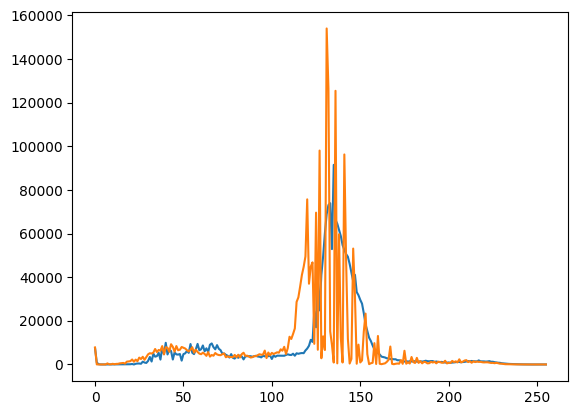

In [58]:
image_target = cv2.imread("data/wildtrack/images/3/000000.jpg")
image_not_tonemaped = cv2.imread("data/wildtrack/images/6/000000.jpg")

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_target, cv2.COLOR_BGR2RGB))
plt.title("Target Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_not_tonemaped, cv2.COLOR_BGR2RGB))
plt.title("Not Tonemaped Image")
plt.axis("off")

plt.show()

# Tonemapping

image = cv2.cvtColor(image_not_tonemaped, cv2.COLOR_BGR2LAB)
reference = cv2.cvtColor(image_target, cv2.COLOR_BGR2LAB)

plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
plt.plot(cv2.calcHist([reference], [0], None, [256], [0, 256]))
plt.show()

matched = image.copy()
matched = match_histograms(image, reference, channel_axis=-1)


matched = cv2.cvtColor(matched, cv2.COLOR_LAB2RGB)


plt.imshow(matched)
plt.show()
plt.plot(cv2.calcHist([reference], [0], None, [256], [0, 256]))
plt.plot(cv2.calcHist([matched], [0], None, [256], [0, 256]))
plt.show()

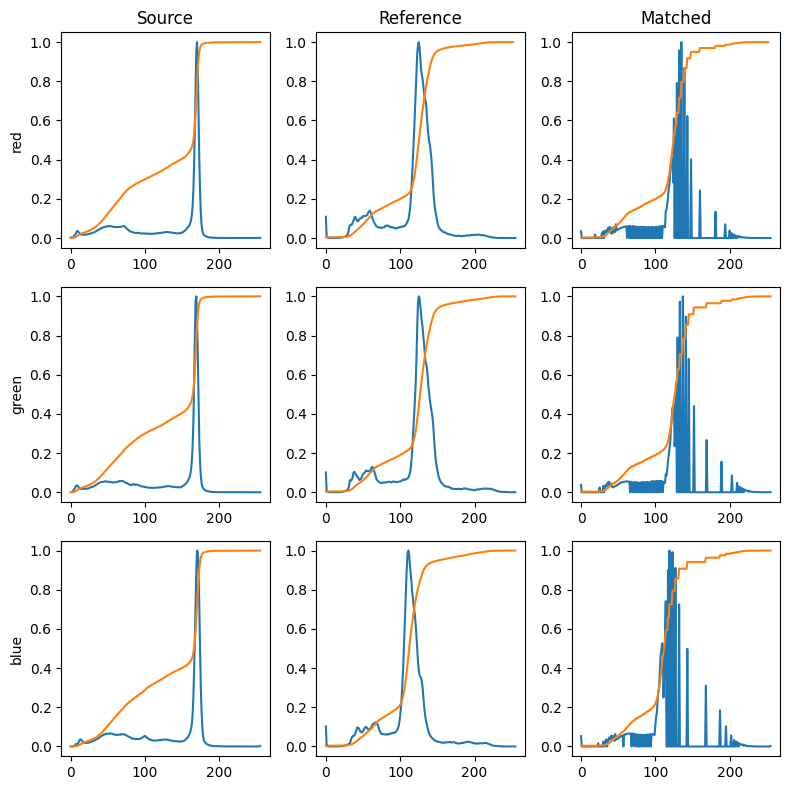

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from easymocap.mytools.camera_utils import write_camera, read_camera
from tqdm import tqdm
from easymocap.neuralbody.dataset.utils_sample import create_cameras_mean
root = r"data\wildtrack"

camera_id = "6"
    
cams = read_camera(root + "/intri.yml", root + "/extri.yml", ["1", "2", "3", "4", "5", "6", "7"])
K, R, T = cams[camera_id]["K"], cams[camera_id]["R"], cams[camera_id]["T"]

camera_args = {
    "center" : [0,0],
    "allstep" : 300,
}
cams = [cams[d] for d in cams["basenames"]]
create_cameras_mean(cams, camera_args)
alpha = 9.52880244056566

[sample] camera centers:  [0.         0.         2.51789141]
[sample] camera radius:  14.748756087350618
[sample] camera start theta:  0.2454654897095052


(array([[[1.72840128e+03, 0.00000000e+00, 9.54664847e+02],
         [0.00000000e+00, 1.73835050e+03, 4.47274366e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        [[1.72840128e+03, 0.00000000e+00, 9.54664847e+02],
         [0.00000000e+00, 1.73835050e+03, 4.47274366e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        [[1.72840128e+03, 0.00000000e+00, 9.54664847e+02],
         [0.00000000e+00, 1.73835050e+03, 4.47274366e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        ...,
 
        [[1.72840128e+03, 0.00000000e+00, 9.54664847e+02],
         [0.00000000e+00, 1.73835050e+03, 4.47274366e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        [[1.72840128e+03, 0.00000000e+00, 9.54664847e+02],
         [0.00000000e+00, 1.73835050e+03, 4.47274366e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],
 
        [[1.72840128e+03, 0.00000000e+00, 9.54664847e+02],
         [0.00000000e+00, 